In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
path = "results/"
results = {}
# go through each folder and load all results '.npy' files
for folder in os.listdir(path):
    results[folder] = {}
    for file in os.listdir(path + folder):
        results[folder][file[:-4]] = np.load(path + folder + "/" + file)

----------------------------------------
Analysing metric: closest_real
Analysing 4 methods


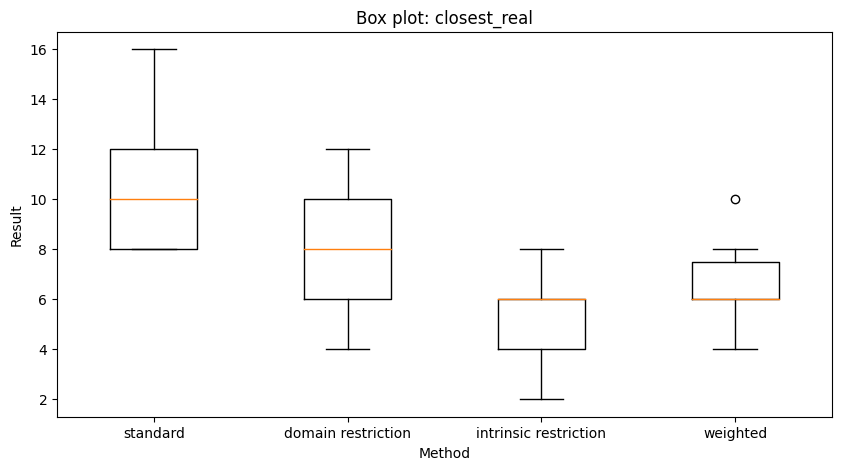

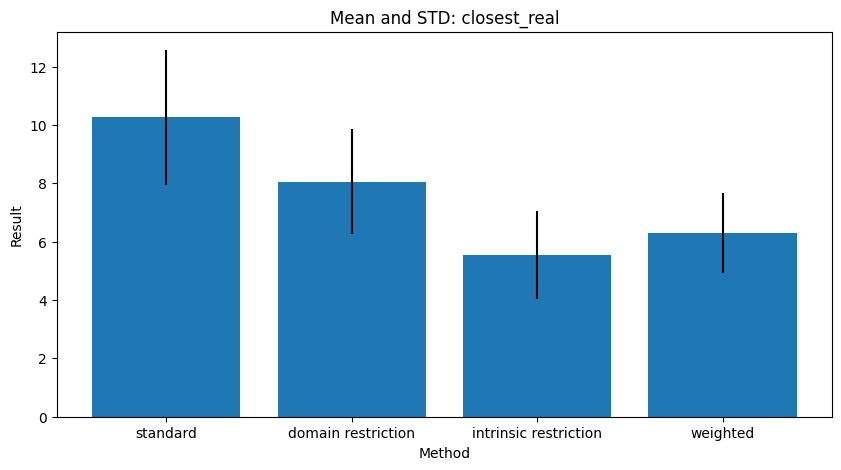

Average and standard deviation of each method:
standard : 10.26086956521739 2.307217245464626
domain restriction : 8.06060606060606 1.8080525927486422
intrinsic restriction : 5.55 1.515750639122412
weighted : 6.294117647058823 1.3832912960358643
----------------------------------------
Analysing metric: distance
Analysing 4 methods


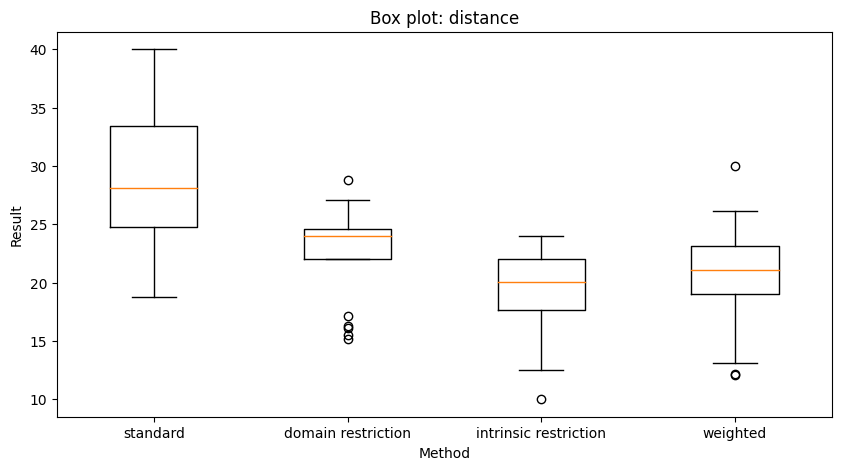

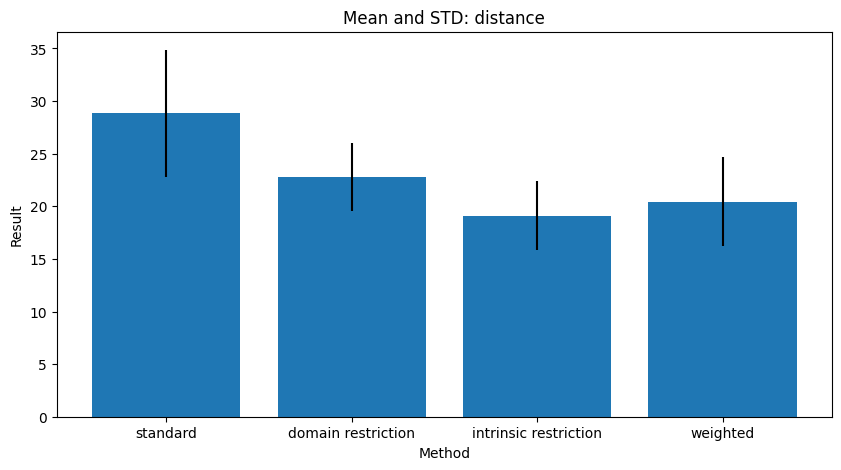

Average and standard deviation of each method:
standard : 28.82570048309179 6.026116263399267
domain restriction : 22.826430976430977 3.229960008712293
intrinsic restriction : 19.11058333333333 3.2618163726076164
weighted : 20.44186274509804 4.25410465821361
----------------------------------------
Analysing metric: distance_weighted
Analysing 4 methods


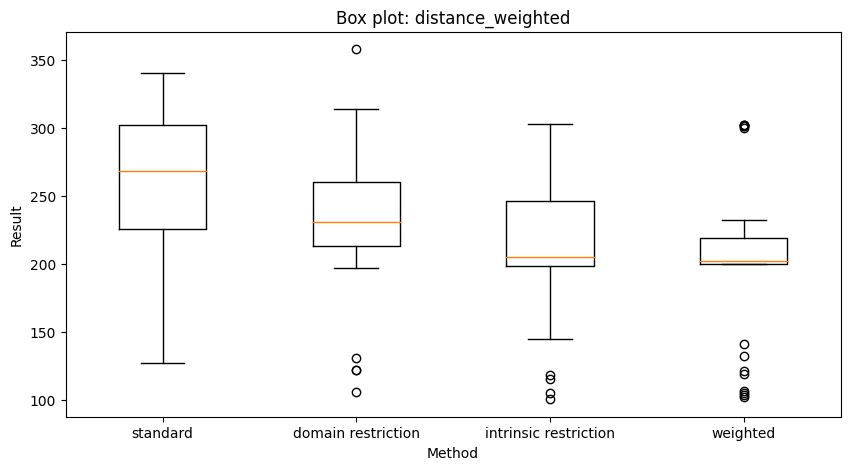

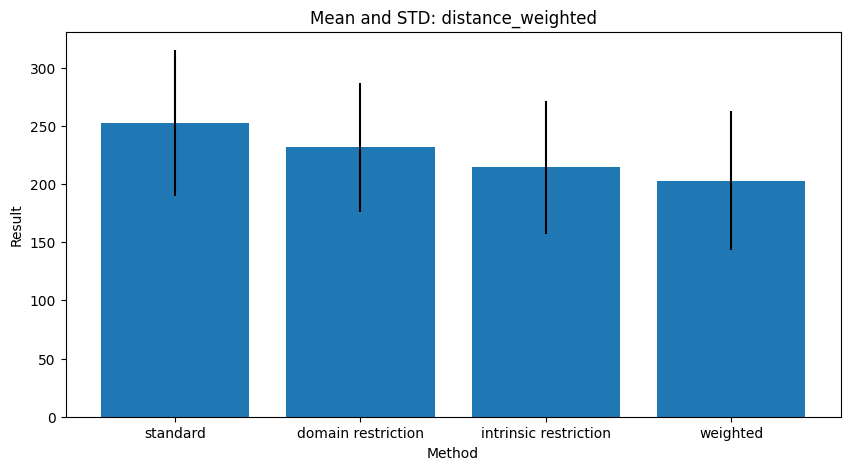

Average and standard deviation of each method:
standard : 252.44017862606387 62.692419206801844
domain restriction : 231.58679683435946 55.21630334799182
intrinsic restriction : 214.42222267834322 57.231022177620204
weighted : 202.92531366532762 60.04147564410196
----------------------------------------
Analysing metric: misfit
Analysing 4 methods


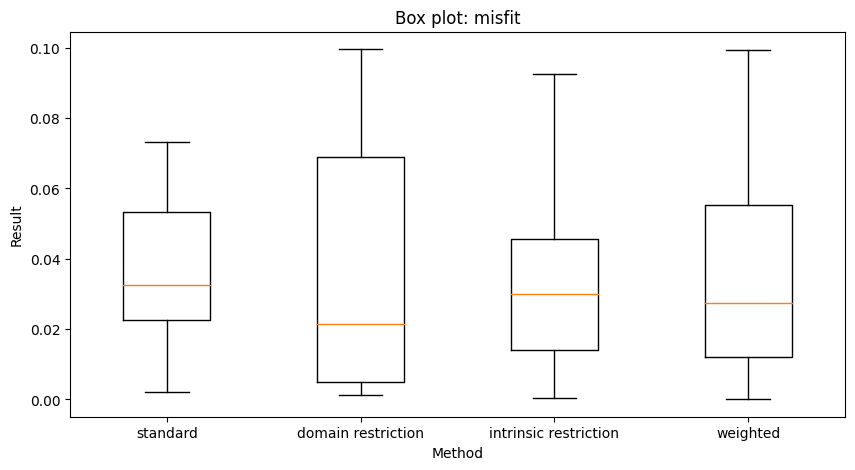

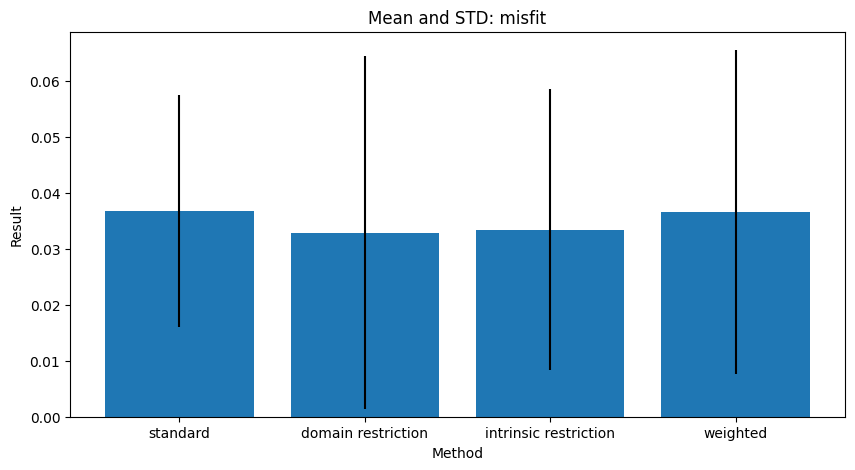

Average and standard deviation of each method:
standard : 0.03672479972278445 0.02075825477934128
domain restriction : 0.03289166453640657 0.03154316629340325
intrinsic restriction : 0.03340786736888054 0.02509529166200151
weighted : 0.03660309026188221 0.028928717075234547
----------------------------------------
Analysing metric: sparsity
Analysing 4 methods


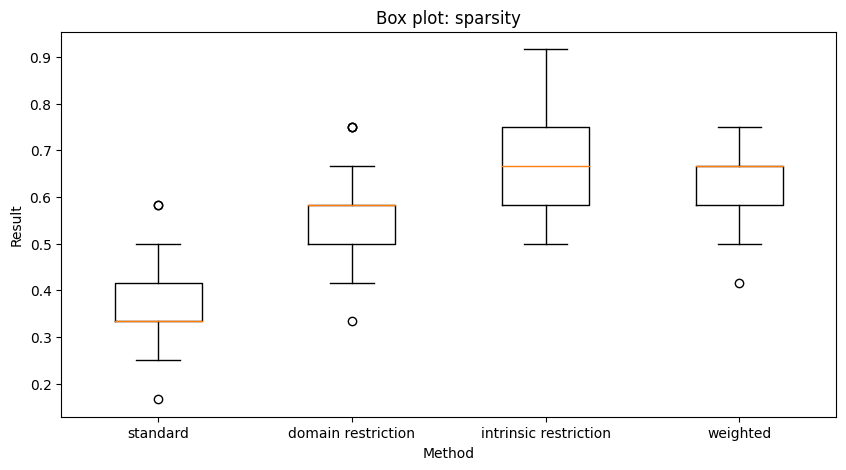

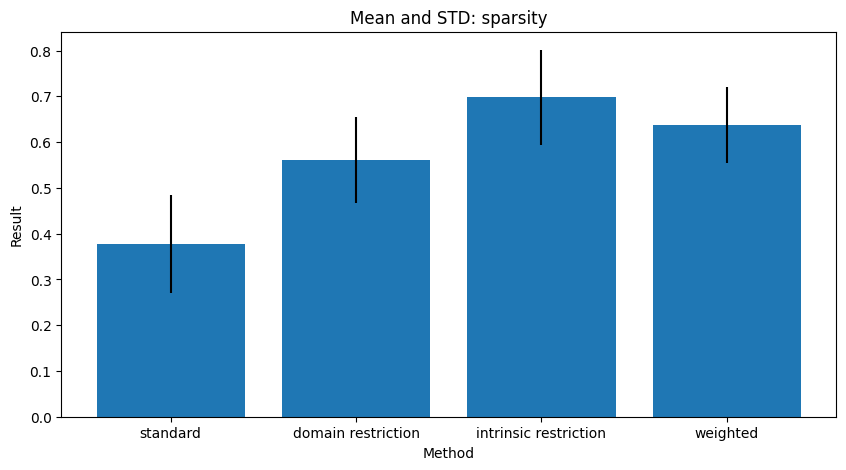

Average and standard deviation of each method:
standard : 0.3768115942028986 0.10674579610620462
domain restriction : 0.5606060606060606 0.09462118179391511
intrinsic restriction : 0.6979166666666667 0.10322490951531246
weighted : 0.6372549019607844 0.0830444820887128


In [3]:
# each key in results represents a metric, analyse each one with same code
def analyse_metric(data, name):
    # Define custom order
    custom_order = ["standard", "domain restriction", "intrinsic restriction", "weighted"]

    # Sort the dictionary keys based on the custom order
    sorted_keys = sorted(data.keys(), key=lambda x: custom_order.index(x))

    # count how many methods that was used
    methods = len(data)
    print(f"Analysing {methods} methods")

    # box plot each method
    plt.figure(figsize=(10, 5))
    plt.title("Box plot: " + name)
    plt.xlabel("Method")
    plt.ylabel("Result")
    plt.boxplot([data[key] for key in sorted_keys])
    plt.xticks(range(1, methods + 1), sorted_keys)
    plt.show()

    # plot average and standard deviation of each method
    plt.figure(figsize=(10, 5))
    plt.title("Mean and STD: " + name)
    plt.xlabel("Method")
    plt.ylabel("Result")
    plt.bar(range(1, methods + 1), [np.mean(data[key]) for key in sorted_keys], yerr=[np.std(data[key]) for key in sorted_keys])
    plt.xticks(range(1, methods + 1), sorted_keys)
    plt.show()

    # print average and standard deviation of each method
    print("Average and standard deviation of each method:")
    for key in sorted_keys:
        print(key, ":", np.mean(data[key]), np.std(data[key]))


# analyse each metric
for key, value in results.items():
    print("-"*40)
    print("Analysing metric:", key)
    analyse_metric(value, key)